# Scikit-learn Basics

This session will cover the basics of Scikit-Learn, a popular package containing a collection of tools for machine learning written in Python. See more at http://scikit-learn.org.

## Loading an example dataset

Let's start by loading some [pre-existing datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) in the scikit-learn, which comes with a few standard datasets. For example, the [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) datasets for classification and the [boston house prices](http://archive.ics.uci.edu/ml/datasets/Housing) dataset for regression. Using these existing datasets, we can easily test the algorithms that we are interested in. 

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the .target member. More details on the different datasets can be found in the dedicated section.

### Load iris

The iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.


| [![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg)](https://en.wikipedia.org/wiki/Iris_setosa)  | [![Iris Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg)](https://en.wikipedia.org/wiki/Iris_virginica) | [![Iris Versicolor](https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg)](https://en.wikipedia.org/wiki/Iris_versicolor) |
|:---:|:---:|:---:|
| Iris Setosa| Iris Virginica| Iris Versicolor|

In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.feature_names)
# only print the first 10 samples
print(iris.data[:10])
print('We have %d data samples with %d features'%(iris.data.shape[0], iris.data.shape[1]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
We have 150 data samples with 4 features


The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. The following prints out the target names and the representatoin of the target using 0, 1, 2. Each of them represent a class. 

In [4]:
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


### Load Digits

This dataset is made up of 1797 8x8 images. Each image, like the ones shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

In [5]:
digits = datasets.load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


In [6]:
print(digits.data)
print('The targets are:')
print(digits.target_names)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
The targets are:
[0 1 2 3 4 5 6 7 8 9]


In the digits, each original sample is an image of shape (8, 8) and it is flattened into a 64 dimension vector here. 

In [7]:
print(digits.data.shape)

(1797, 64)


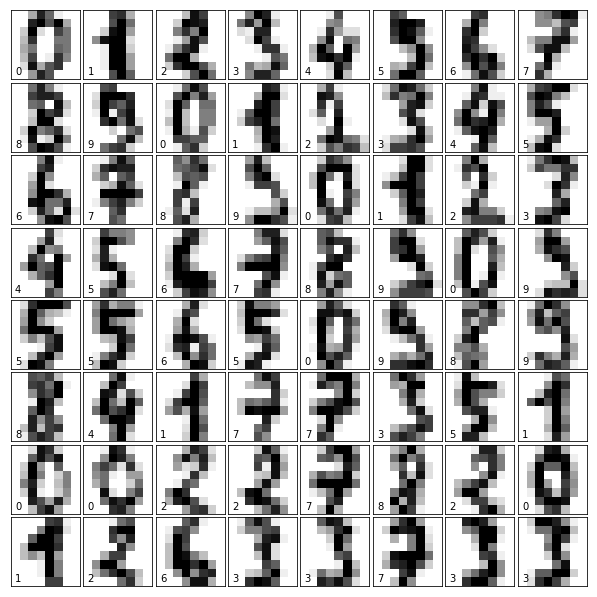

In [8]:
## plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

### Load Boston Housing Data

The Boston housing dataset reports the median value of owner-occupied homes in various places in the Boston area, together with several variables which might help to explain the variation in median value, such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes that you can find the details [here](https://archive.ics.uci.edu/ml/datasets/housing). 

In [9]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

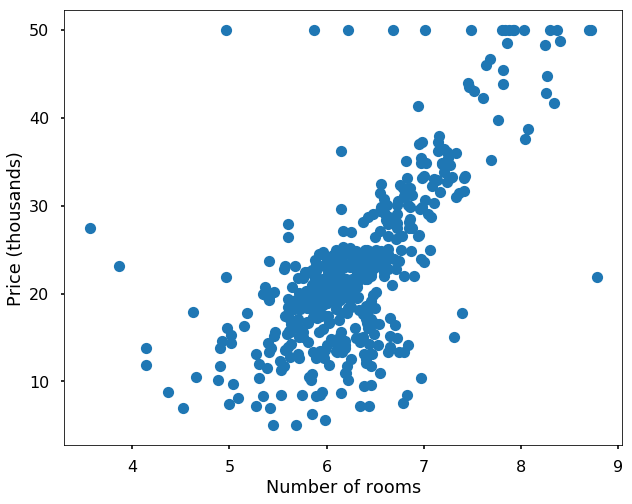

In [11]:
# let's just plot the average number of rooms per dwelling with the price
plt.figure(figsize = (10,8))
plt.plot(boston.data[:,5], boston.target, 'o')
plt.xlabel('Number of rooms')
plt.ylabel('Price (thousands)')

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [12]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [13]:
# you can check the parameters as
LinearRegression?

In [14]:
# let's change one parameter
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [15]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

### Simple regression problem

Let's fit a simple linear regression model to see what is the sklearn API looks like. We use a very simple datasets with 10 samples with added in noise. 

In [16]:
x = np.arange(10)
y = 2 * x + 1

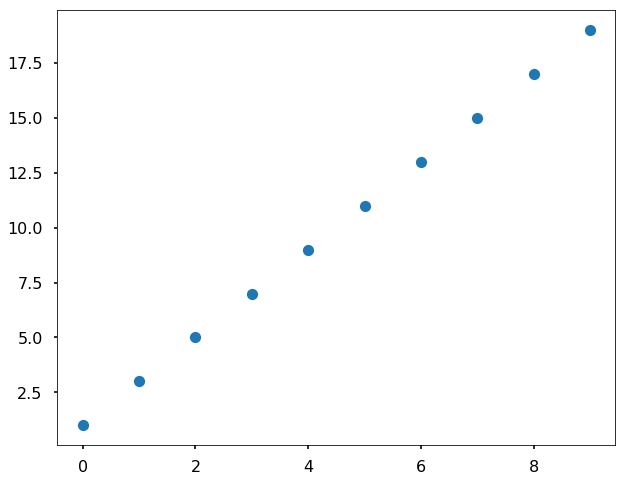

In [17]:
plt.figure(figsize = (10,8))
plt.plot(x,y,'o')

In [18]:
# generate noise between -1 to 1
# this seed is just to make sure your results are the same as mine
np.random.seed(42)
noise = 2 * np.random.rand(10) - 1

# add noise to the data
y_noise = y + noise

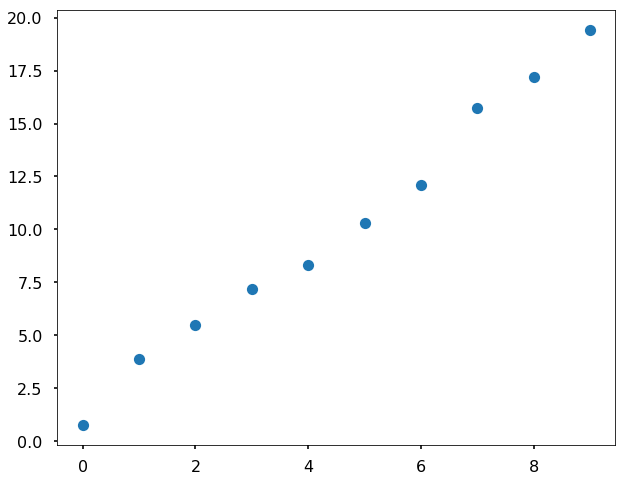

In [19]:
plt.figure(figsize = (10,8))
plt.plot(x,y_noise,'o')

In [20]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y_noise)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[  0.74908024   3.90142861   5.46398788   7.19731697   8.31203728
  10.31198904  12.11616722  15.73235229  17.20223002  19.41614516]


In [21]:
# model fitting is via the fit function
model.fit(X, y_noise)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[ 1.99519708]
1.06188659819


In [23]:
# then we can use the fitted model to predict new data
predicted = model.predict(X)

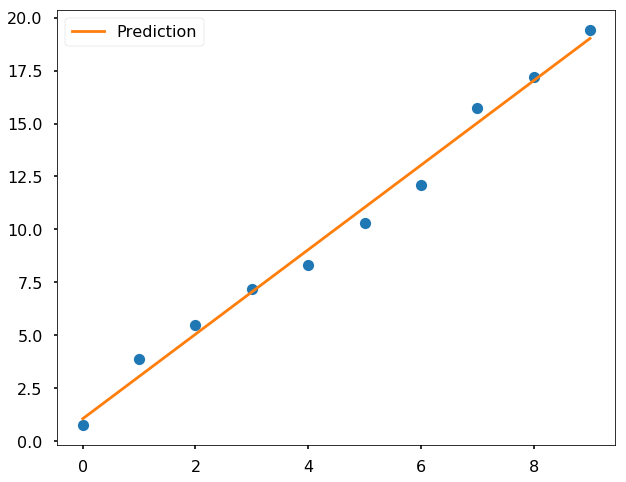

In [24]:
plt.figure(figsize = (10,8))
plt.plot(x,y_noise,'o')
plt.plot(x,predicted, label = 'Prediction')
plt.legend()

## Exercise

In the next section, we will use support vector machine (SVM) to do a classification problem, have a look of the [sklearn API](http://scikit-learn.org/stable/modules/classes.html), and find out which class we will use for a classification problem using SVM. (hint: we will use the one with C support). 

In [25]:
# %load ../solutions/solution_01.py
from sklearn.svm import SVC

# have a look of the details about SVC
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC